# Análise exploratória de dados

In [46]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do conjunto de dados
***

In [86]:
df = pd.read_csv('../data/raw/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Descrição dos dados
***

[**Titanic - Machine Learning from Disaster**](https://www.kaggle.com/c/titanic/overview) é um conjunto de dados com informações dos passageiros do lendário [RMS Titanic](https://pt.wikipedia.org/wiki/RMS_Titanic). Este conjunto de dados faz parte de uma competição de Aprendizado de Máquina feita no [Kaggle](https://www.kaggle.com/).

[**Titanic - Machine Learning from Disaster**](https://www.kaggle.com/c/titanic/overview) pode ser usado em projetos de aprendizado de máquina, sendo ```survived``` a variável *target* e as demais variáveis, as *features*.
***

### 2.1 Dicionário de dados
***

In [3]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
pd.set_option('display.max_colwidth', None)
dicionario

,variavel,descricao,tipo,subtipo
0,survived,Passageiro sobreviveu (1) ou não (0),qualitativa,nominal
1,pclass,"Classe do passageiro (1, 2, 3)",qualitativa,ordinal
2,sex,Sexo do passageiro,qualitativa,nominal
3,age,Idade do passageiro,quantitativa,continua
4,sibsp,Número de irmãos/conjuges a bordo,quantitativa,discreta
5,parch,Número de pais/filhos a bordo,quantitativa,discreta
6,fare,Tarifa paga pelo passageiro,quantitativa,continua
7,embarked,Porto de embarque do passageiro (C = Cherbourg; Q = Queenstown; S = Southampton),qualitativa,nominal
8,class,"Classe do bilhete do passageiro (First, Second, Third)",qualitativa,ordinal
9,who,"Categoria do passageiro (man, woman, child)",qualitativa,nominal


- O conjunto de dados possui 15 variáveis, distribuidas em:
    - 2 quantitativas contínuas
    - 2 quantitativas discretas
    - 9 qualitativas nominais
    - 2 qualitativas ordinais
***

## 3. Perguntas de partida e hipóteses

- Quais os tipos de dados e dimensão do conjunto?
- Existem valroes ausentes ou valores nulos? Se sim, quantos são e em quais variáveis são?
- Qual a distribuição das variáveis? Há dados duplicados?
- Qual a relação entre o gênero dos passageiros e os sobreviventes?
- Qual a relação relação entre a categoria do passageiro e os sobreviventes?
- Qual a relação relação entre classe dos passageiros e os sobreviventes?
- Qual a relação relação entre a idade dos passageiros e os sobreviventes?
- Qual a relação relação entre a taxa paga pelos passageiros e os sobreviventes?

### 3.1 Quais os tipos de dados e dimensão do conjunto?
***

In [27]:
print("Tipos de Dados:")
print(df.info())

Tipos de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


- Este conjunto de dados possui 891 linhas e 15 colunas, que são distribuidas em:
    - 6 variáveis numéricas
    - 7 variáveis categóricas
    - 1 variável booleana
    
- Note que algumas linhas possuem uma quantidade de valores não-nulos menor que a quantidade total de linhas, logo, existem valores nulos no dataset

### 3.2 Existem valores ausentes ou valores nulos? Se sim, quantos são e em quais variáveis são?
***

In [26]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


É possível notar que existem valores ausentes em 4 colunas: ```age```, ```embarked```, ```deck```, ```embark_town```

#### 3.2.2 Porcentagem de valores nulos por variável
***

In [25]:
def missing_values_percentage(column):
    value = (df[column].isnull().sum())/df.shape[0]*100
    print(f'{value:.2f}% dos dados da coluna {column} são nulos')

missing_values_percentage('age')
missing_values_percentage('embarked')
missing_values_percentage('deck')
missing_values_percentage('embark_town')




19.87% dos dados da coluna age são nulos
0.22% dos dados da coluna embarked são nulos
77.22% dos dados da coluna deck são nulos
0.22% dos dados da coluna embark_town são nulos


- A partir dessa análise é possivel perceber que as colunas ```age```, ```embarked```, ```deck```, ```embark_town``` possuem diferentes porcentagens de valores nulos, sendo:
    - 19.87% dos dados de ´´´age´´´ são nulos
    - 00.22% dos dados de ´´´embarked´´´ são nulos
    - 77.22% dos dados de ´´´deck´´´ são nulos
    - 00.22% dos dados de ´´´embark_town´´´ são nulos

#### 3.2.3 Quantidade de linhas que contém pelo menos um valor nulo
***

In [34]:
missing_lines = df.isnull().any(axis=1)
print(missing_lines.sum())
print(f'{missing_lines.sum()/df.shape[0]*100:.2f}%')

709
79.57%


- De um total de 891 linhas, 709 delas contém pelo menos um valor ausente, oque representa 79.57% do conjunto de dados
- Dado que quantidade de linhas com pelo menos um dado faltante é muito extensa quando comparada com o total do conjunto, e que a maior parte desses dados ausentes são, unicamente, da coluna ```deck```, as linhas contendo dados faltantes serão mantidas.

### 3.3 Qual a distribuição das variáveis? Há dados duplicados?
***

In [36]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- A partir de ```df.describe()``` é possível tirar algumas conclusões:   
   - Menos da metade dos passageiros sobreviveram
    - Existem mais passageiros do sexo masculino
    - A média de idade dos passageiros é em torno de 29 anos, com um mínimo de idade menor que 1 ano e um máximo de 80 anos
    - Mais da metade dos passageiros estavam na terceira classe
    - Mais da metade dos passageiros embarcaram de Southampton
    - Mais da metade dos passageiros embarcaram no navio sozinho

#### 3.3.1 Distribuição das variáveis qualitativas
***

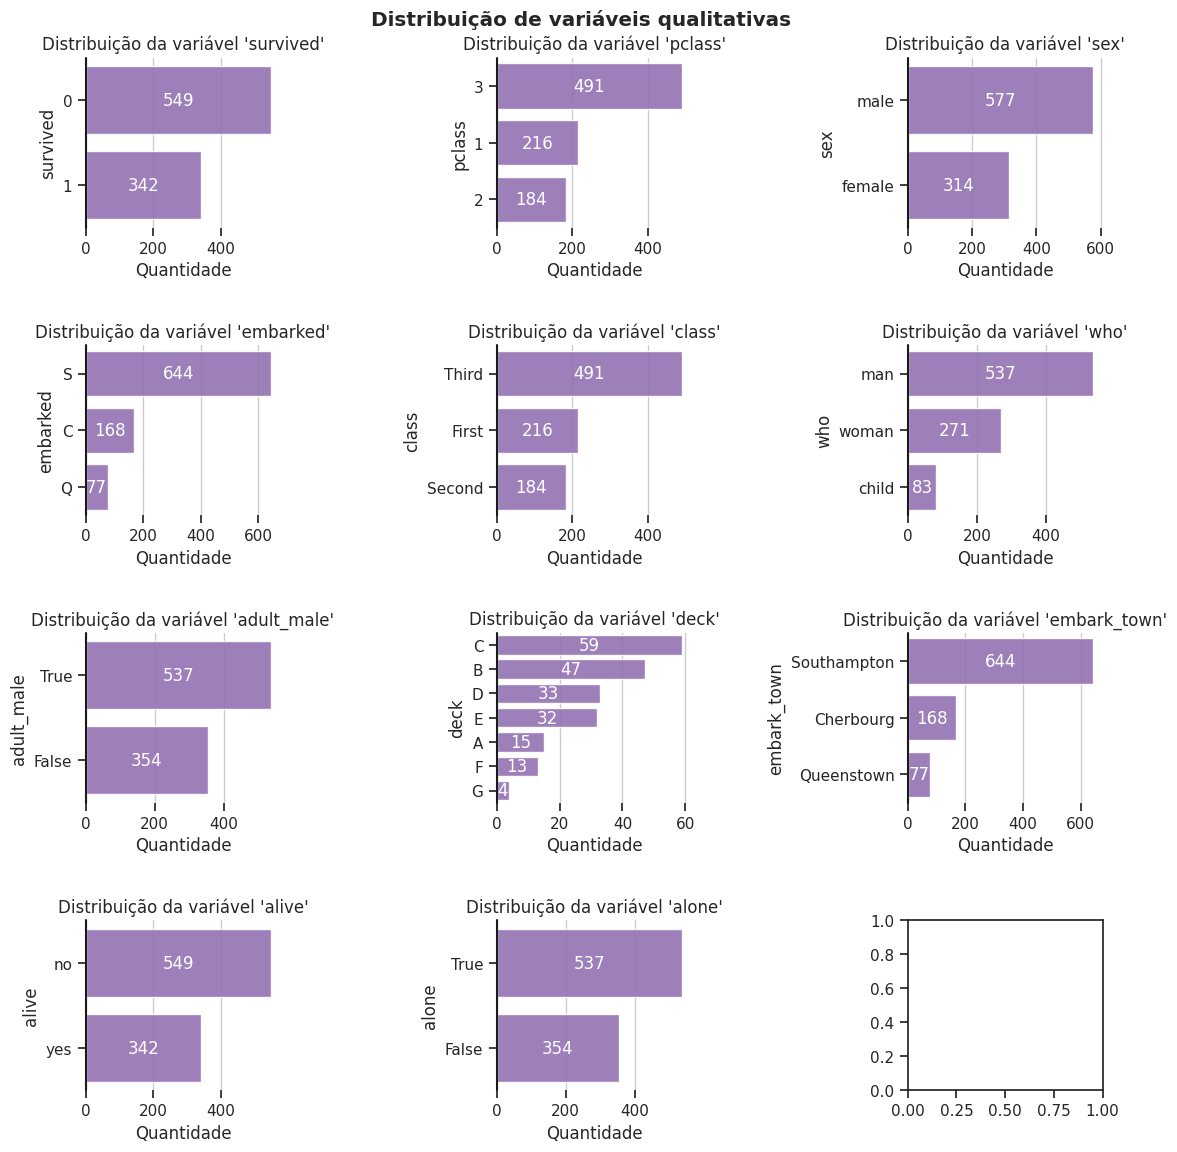

In [50]:
fig, axes = plt.subplots(4, 3, figsize=(12,12))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        y=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order,
        orient='h'
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axvline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_xlabel('Quantidade')
    ax.grid(axis='x', linestyle='-')
plt.show()

- A partir dos gráficos acima é possível tirar algumas conclusões:
    - A menor quantidade de passageiros estava da segunda classe
    - Existem dados duplicados, ou seja, colunas que possuem a mesmma informação, são elas:
        - ```survived``` e ```alive```
        - ```pclass``` e ```class```
        - ```embarked``` e ```embark_town```
    - A variável ```adult_male``` é uma variável redundante, ao passo que que a variável ```who``` msotra a quantidade de homens adultos, mulheres adultas e crianças

#### 3.3.1 Distribuição das variáveis quantitativas
***

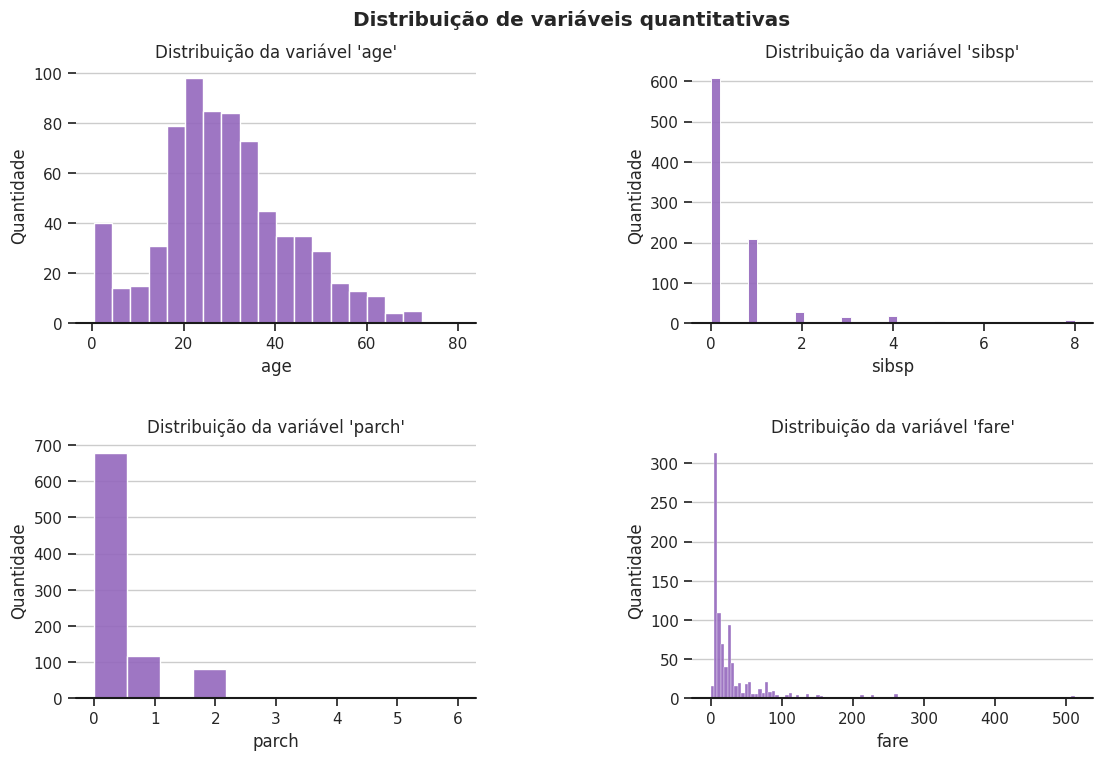

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

- A partir dos gráficos acima é possível tirar algumas conclusões:
    - A distribuição de idade mostra que existe uma quantidade considerável de passageiros com idade menor que 10 anos
    - A maioria dos passageiros eram jovens adultos, entre 20-40 anos
    - A maioria dos passageiros pagou uma taxa de baixo valor, possivelmente devido a maioria dos passageiros serem da terceira classe

### 3.4 Qual a relação relação entre o gênero dos passageiros e os sobreviventes?
***

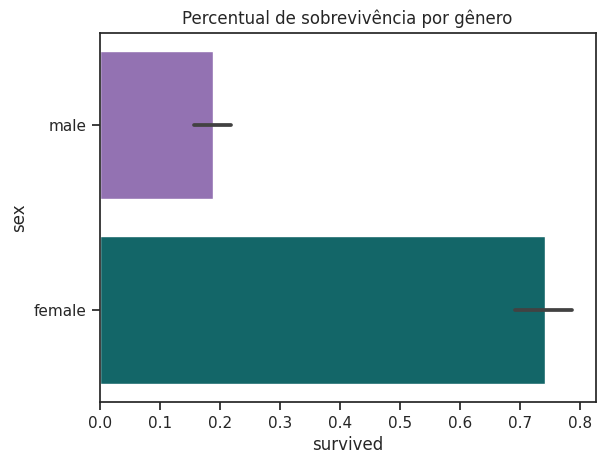

In [73]:
sns.barplot(data=df, x='survived', y='sex')
plt.title('Percentual de sobrevivência por gênero')
plt.show()

In [72]:
sex_survival = df.groupby('sex')['survived'].mean()
print(sex_survival)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


- É possível notar que, apesar de homens serem a maioria, menos de 20% dos homens (do conjunto) conseguiram sobreviver

### 3.5 Qual a relação relação entre a categoria dos passageiros e os sobreviventes?
***

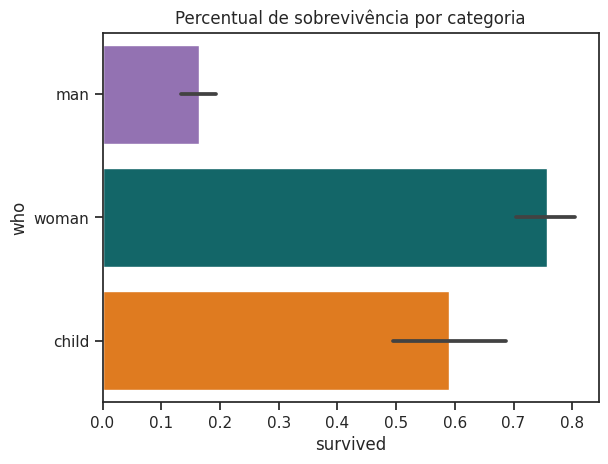

In [66]:
sns.barplot(data=df, x='survived', y='who')
plt.title('Percentual de sobrevivência por categoria')
plt.show()

In [70]:
who_survival = df.groupby('who')['survived'].mean()
print(who_survival)

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64


- A partir desses dados é possível ver que:
    - menos de 60% das crianças sobreviveram
    - 75% das mulheres sobreviveram
    - somente 16% dos homens sobreviveram

### 3.6 Qual a relação relação entre classe dos passageiros e os sobreviventes?
***

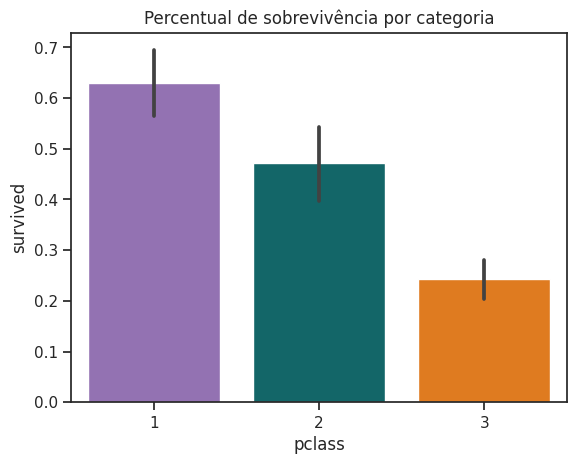

In [68]:
sns.barplot(data=df, x='pclass', y='survived')
plt.title('Percentual de sobrevivência por classe')
plt.show()

In [75]:
pclass_survival = df.groupby('pclass')['survived'].mean()
print(pclass_survival)

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


- A partir desses dados é possível ver que:
    - Mesmo sendo minoria, os passageiros da primeira e terceira classe tiveram uma taxa de sobrevivencia muito maior que o passageiros de terceira classe

### 3.7 Qual a relação relação entre a idade dos passageiros e os sobreviventes?
***

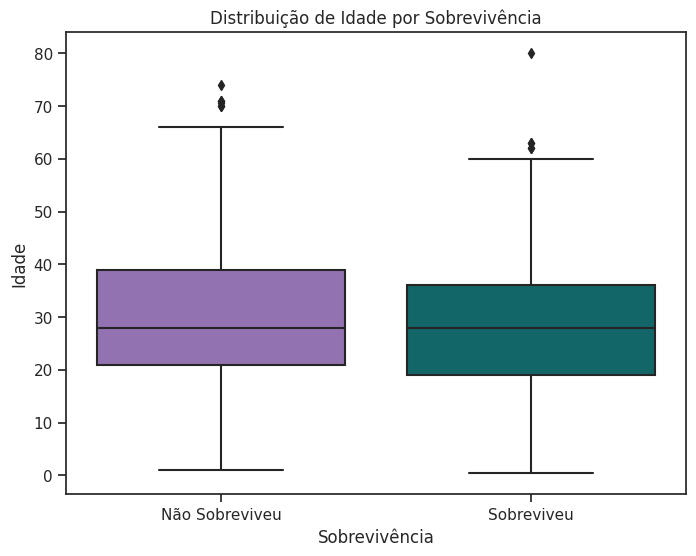

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Sobrevivência')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.show()

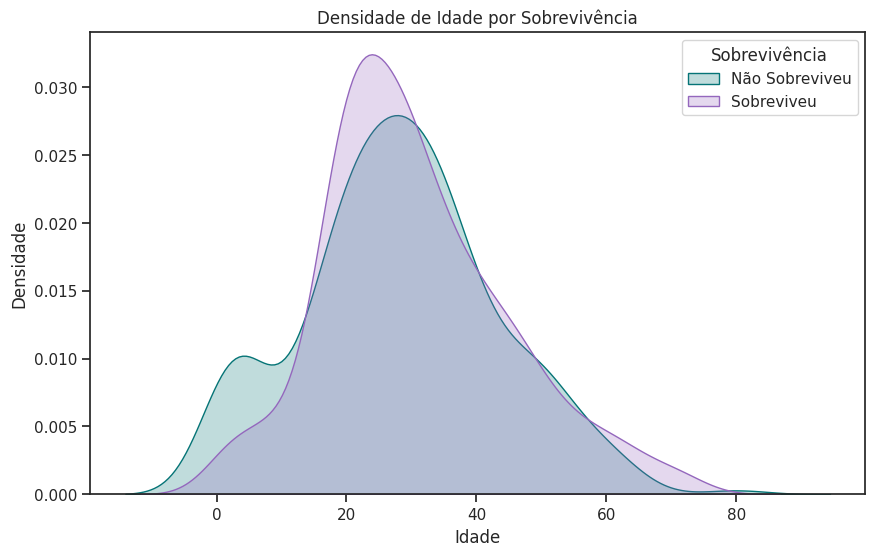

In [89]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='survived', common_norm=False, fill=True)
plt.title('Densidade de Idade por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

- A densidade do gráfico mostra que a maioria das pessoas que sobreviveram e que não sobreviveram, tinham a faixa etária média (20-40 anos)
- O gráfico mostra também que uma quantidade considerável de crianças não sobreviveram

###  3.8 Qual a relação extre a idade, a classe e a taxa de sobrevivência dos passageiros?
***

/mnt/c/Users/VINCENZO/Documents/coding/AvantiBootcamp/avanti-bootcamp-cdd/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/mnt/c/Users/VINCENZO/Documents/coding/AvantiBootcamp/avanti-bootcamp-cdd/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/mnt/c/Users/VINCENZO/Documents/coding/AvantiBootcamp/avanti-bootcamp-cdd/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/mnt/c/Users/VINCENZO/Documents/coding/AvantiBootcamp/avanti-bootcamp-cdd/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWa

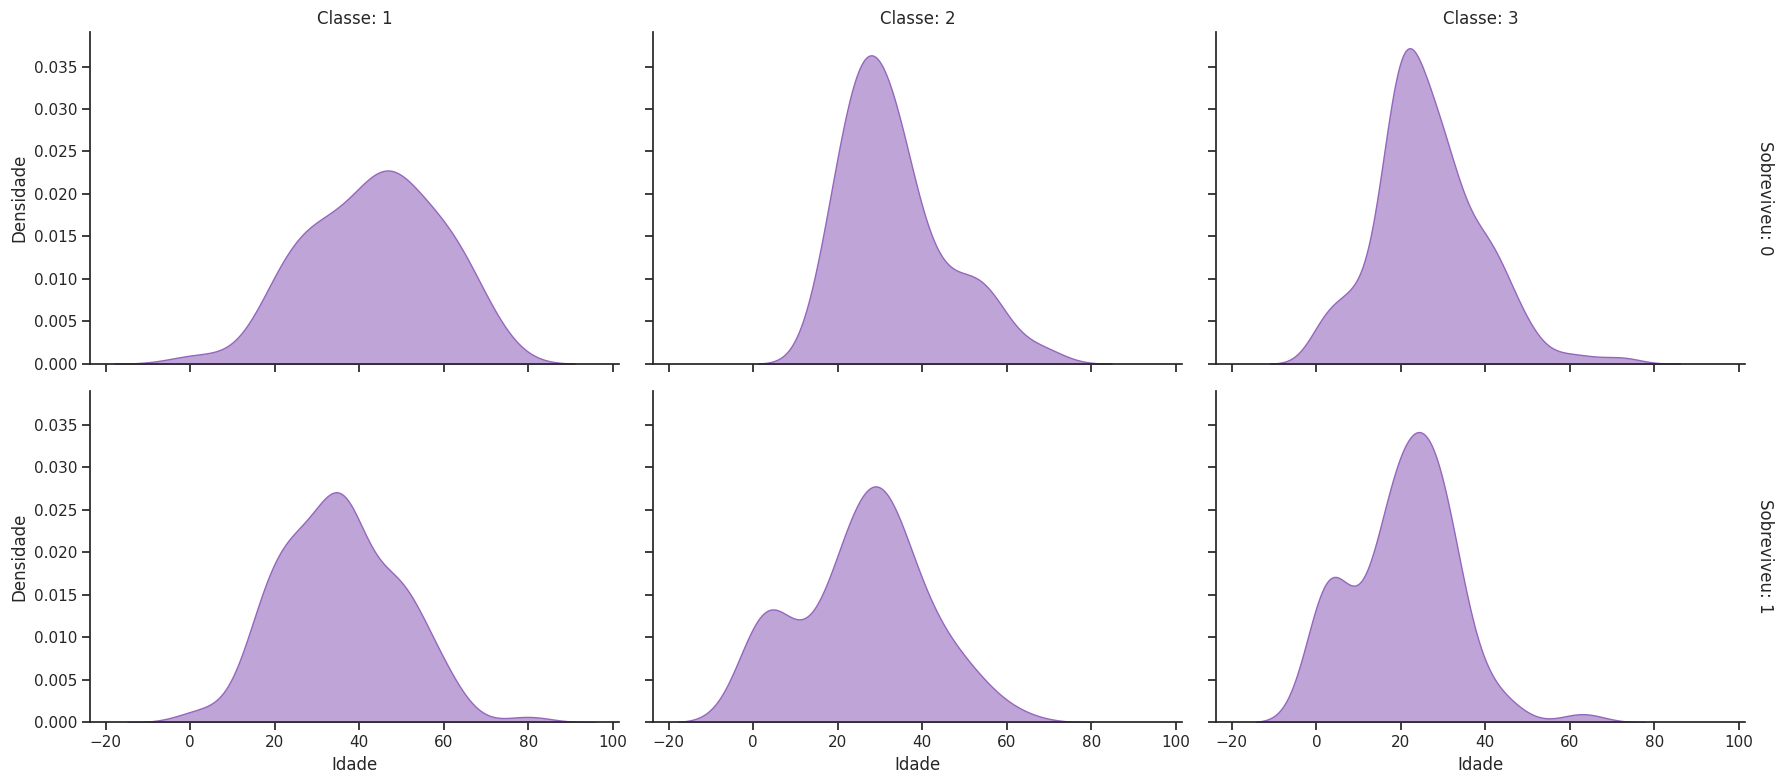

In [107]:
g = sns.FacetGrid(df, col='pclass', row='survived', margin_titles=True, height=4, aspect=1.5)
g.map(sns.kdeplot, 'age', fill=True, alpha=0.6)
g.set_axis_labels('Idade', 'Densidade')
g.set_titles(col_template='Classe: {col_name}', row_template='Sobreviveu: {row_name}')
plt.show()

In [105]:
for i in range(3):
    df_class = df[df['pclass'] == (i+1)]
    mean_age_class = df_class['age'].mean()
    print(f'{i+1} classe: {mean_age_class}')

1 classe: 38.233440860215055
2 classe: 29.87763005780347
3 classe: 25.14061971830986


- Dados os gráficos, é possivel ver que:
    - Na primeira classe os gráficos tem as mesmas curvas, o que mostra que a faixa etária média foi a que mais sobreviveu/faleceu
    - Na segunda classe, é possível notar que as pessoas mais velhas faleceram com mais densidade, em contrapartida com as crianças que sobreviveram mais
    - Na terceira classe, é possível ver que a maioria dos mortos tinham entre 20-40 anos, como pode ser visto na curva acentuada. É possível notar também que as pessoas mais velhas faleceram com mais densidade, em contrapartida com as crianças que sobreviveram mais

## 3. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

- Menos da metade dos passageiros sobreviveram
- Existem mais passageiros do sexo masculino
- A média de idade dos passageiros é em torno de 29 anos, com um mínimo de idade menor que 1 ano e um máximo de 80 anos
- Mais da metade dos passageiros estavam na terceira classe
- Mais da metade dos passageiros embarcaram de Southampton
- Mais da metade dos passageiros embarcaram no navio sozinho
- Menos de 20% dos homens sobreviveram
- Mais de 75% das mulheres sobreviveram
- Menos de 60% das crianças sobreviveram
- Mesmo sendo minoria, os passageiros da primeira e terceira classe tiveram uma taxa de sobrevivencia muito maior que o passageiros de terceira classe

